# Data Preprocessing
## Remove duplicated images from CROHME dataset

In [ ]:
import imageio
import numpy as np
import os

# source - https://www.kaggle.com/xainano/handwrittenmathsymbols/discussion/85277
def deletefromfolder(path):
    datadir = path
    print('Directory:', datadir)

    rmmap = dict()
    total = 0
    repeatcnt = 0
    for root, directories, filenames in os.walk(datadir):
        for filename in filenames:
            total += 1
            if filename.endswith('.jpg') and not filename.startswith('._'):
                filei = os.path.join(root, filename)
                imi = imageio.imread(filei)
                npi = np.asarray(imi).reshape(1, -1).reshape((2025, ))
                idf = npi.tolist()
                for i in range(len(idf)):
                    idf[i] = str(idf[i])
                strlist = ''.join(idf)

                if strlist in rmmap.keys():
                    repeatcnt += 1
                    rmmap[strlist].append(filename)
                else:
                    rmmap[strlist] = list()

    #for key in rmmap:
    #    print(rmmap[key])
    print('Repeat/Total: {}/{}'.format(repeatcnt, total))
    for key in rmmap:
        for item in rmmap[key]:
            os.remove(os.path.join(datadir, item))

images_path = './data/crohme/'
dirlist = os.listdir(images_path)
for item in dirlist:
    deletefromfolder(os.path.join(images_path,item))

## Mapping

In [22]:
import pandas as pd

df = pd.read_csv("data/emnist/emnist-balanced-mapping.txt", sep = ' ', header=None, names=["id", "code"])
chars = []
for x in df.code:
    chars.append(chr(x))
    
df["char"] = chars
df.to_csv("data/emnist/processed-mapping.csv", index=False)

## Image transformation to EMNIST format

In [11]:
import numpy as np
import pandas as pd
from PIL import Image,ImageOps
import matplotlib.pyplot as plt

names = ["label"] + ["pixel" + str(i) for i in range(784)]
                     
test = pd.read_csv("data/emnist/emnist-balanced-test.csv", nrows=10, header=None, names=names)

In [12]:
Y_test = test["label"]
X_test = test.drop(labels = ["label"], axis = 1)
del test

In [13]:
X_test = X_test.values.reshape(-1,28,28,1)

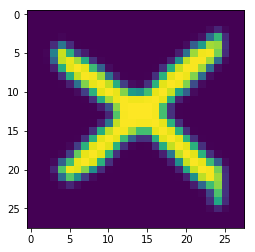

In [43]:
index = Y_test[Y_test == 33].index[0]
emnist_img = X_test[index][:,:,0]
g = plt.imshow(emnist_img)

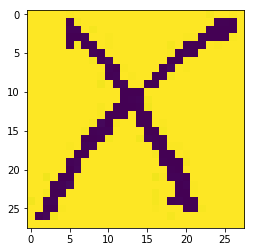

In [37]:
img = Image.open('segmented/1_1_1.jpg').resize((28, 28))
plt.imshow(img)

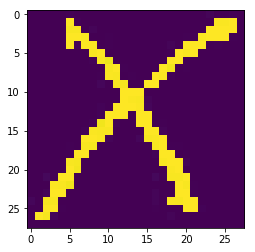

In [38]:
inv_img = ImageOps.invert(img)
plt.imshow(inv_img)

In [40]:
flatten = np.array(inv_img).flatten()
csv_img = ','.join([str(num) for num in flatten])
csv_str = '{},{}'.format(33, csv_img)
csv_img

'0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,255,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,254,255,0,0,0,0,0,0,253,253,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,255,255,253,0,0,1,0,0,0,0,0,0,0,0,0,1,1,254,255,255,255,1,0,0,0,0,0,0,255,3,254,254,0,1,0,0,0,0,0,0,0,3,0,255,255,255,0,1,0,0,0,0,0,0,0,0,0,0,0,253,255,0,0,0,0,0,0,0,0,1,255,253,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,253,249,0,0,0,0,0,0,0,255,255,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,255,1,0,0,0,0,255,250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,254,253,0,1,0,0,255,254,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,254,252,0,0,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,254,253,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,255,255,255,254,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,255,255,255,0,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,250,255,2,0,0,255,255,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,254,253,253,0,0,0

In [42]:
# Open a file for output
f = open("test.csv", "a") 

print(csv_str, file=f)
    
# close file
f.close()